In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import optimizers

In [2]:
df = pd.read_csv("character-predictions2.csv")

In [3]:
df.head()

,Unnamed: 0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
1,1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1
2,2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
4,4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1


In [4]:
ohe = OneHotEncoder(sparse = False) 

df[ohe.get_feature_names_out()] = ohe.fit_transform(df[['house']]) 
df.drop(columns = ["Unnamed: 0","name",'house'], inplace = True)

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/2w/1kgbt4ns7lq0qphmrg44h3ph0000gn/T/ipykernel_14210/84870992.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe.fit_transform(df[['house']])
/var/folders/2w/1kgbt4ns7lq0qphmrg44h3ph0000gn/T/ipykernel_14210/84870992.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [5]:
df.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,...,house_The Citadel,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_wildling
0,1,0,0,0,0,0,0,0,11,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
scaler = RobustScaler()
df[["numDeadRelations","popularity"]] = scaler.fit_transform(df[["numDeadRelations","popularity"]])

In [7]:
df

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,...,house_The Citadel,house_Thenn,house_Thirteen,house_Three-eyed crow,house_Undying Ones,house_Unsullied,house_Windblown,house_Wise Masters,house_brotherhood without banners,house_wildling
0,1,0,0,0,0,0,0,0,11.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,1,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,1,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1,1,1,1,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,1,0,1,0,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,1,1,1,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,0,0,1,1,1,0,0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = df
X = X.drop('isAlive', axis=1)

In [9]:
X.shape

(1946, 359)

In [10]:
y = df["isAlive"]
y = y.to_frame(name="isAlive")
y.head()

,isAlive
0,0
1,1
2,1
3,0
4,1


In [11]:
y.value_counts()

isAlive
1          1451
0           495
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [ ]:
#reg_l1 = regularizers.L1(0.01)
#reg_l2 = regularizers.L2(0.01)
#reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

#adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

#model = Sequential()
#model.add(layers.Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
#model.add(layers.Dense(20, activation='relu', bias_regularizer=reg_l2))
#model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
#model.add(layers.Dense(1, activation='sigmoid'))
#model.compile(optimizer=adam_opt ,loss='binary_crossentropy', metrics = [tf.keras.metrics.Recall(),'accuracy'])


In [1]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model = Sequential()
model.add(layers.Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(20, activation='relu', kernel_regularizer=reg_l2))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=reg_l1_l2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

NameError: name 'regularizers' is not defined

In [47]:
es = EarlyStopping(patience=30)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split =0.3, callbacks=[es], verbose=0)

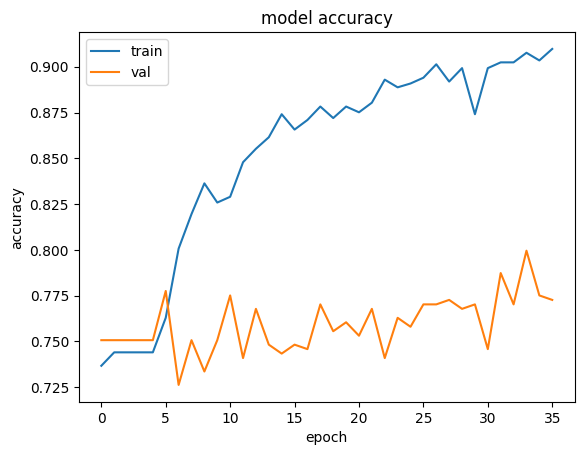

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
tests = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 527us/step - loss: 0.7354 - recall_9: 0.8943 - accuracy: 0.7791


In [ ]:
#train_sizes = [50,150,250,350,450,550,650,750,850]

#train_sizes, train_scores, test_scores = learning_curve(estimator=LogisticRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

#train_scores_mean = np.mean(train_scores, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)

#plt.plot(train_sizes, train_scores_mean, label = 'Training score')
#plt.plot(train_sizes, test_scores_mean, label = 'Test score')
#plt.ylabel('r2 score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.ylim((0,1))
#plt.legend()